# Práctica 2: Modelo cinemático inverso de un  y planteamiento de trayectoria

## Objetivo

El objetivo de esta práctica es que el alumno comprenda, interprete y modifique la información básica de los formatos de Universal Robot Description File (URDF).


### Metas 

- Que el alumno aplique un modelo cinemático inverso para calcular una trayectoria a partir de una posición actual hacia una posición final
- Que el alumno grafique y analice los resultados del modelo
- Que el alumno configure un repositorio en línea e incluya en éste su práctica

### Contribución al perfil del egresado

La siguiente práctica contribuye en los siguientes puntos al perfil del egresado:

#### Aptitudes y habilidades

- Para modelar, simular e interpretar el comportamiento de los sistemas mecatrónicos.
- Para diseñar, construir, operar y mantener los sistemas mecatrónicos y sus componentes.

#### Actitudes

- Tener confianza en su preparación académica.
- Comprometido con su actualización, superación y competencia profesional.

#### De tipo social

- Promover el cambio en la mentalidad frente a la competitividad internacional.

## Rúbrica de evaluación

La evaluación de la práctica contará de los siguientes puntos y se evaluará con los siguientes criterios:

| Elemento | Porcentaje |
| ------:| ----------- |
| **Cuestionario previo** | 15% | 
| **Desarrollo** | 35% |
| **Análisis de resultados**  | 35% |
| **Conclusiones** | 15% |

| Elemento | Malo | Regular | Bueno |
| ------:| ------ | --------| ------|
| **Cuestionario previo** | El trabajo no contiene cuestionario previo o todas las preguntas son incorrectas (0%)| Al menos la mitad de las preguntas son correctas (8%) |  Todas las preguntas son correctas (15%) |
| **Desarrollo** | El trabajo no contiene desarrollo o su planteamiento no concuerda con lo deseado (0%) | El desarrollo está mal planteado o no llega a los resultados esperados (10%) | El desarrollo tiene un planteamiento adecuado y llega a los resultados esperados (35%) |
| **Análisis de resultados**  | El trabajo no contiene análisis de resultados o la información no se está interpretando correctamente (0%) | La interpretación de los resultados es parcial o desorganizada (10%) | Realiza un correcto análisis de los resultados de forma organizada   (35%) |
| **Conclusiones** | El trabajo no contiene conclusiones o no hacen referencia al trabajo desarrollado y los objetivos planteados (0%) | La redacción de las conclusiones es desorganizada o confusa (8%) | Las conclusiones del trabajo son claras y hacen referencia al trabajo desarrollado y los objetivos planteados (15%) | 



## Introducción

### Transformaciones homogéneas
Las transformaciones homogéneas permiten hacer el planteamiento del modelo cinemático de un robot, considerando las posiciones y orientaciones de las juntas del robot respecto al sistema de referencia de una junta anterior

Este planteamiento es el **modelo de cinemática directa**, que nos permite obtener la posición y velocidad del efector final de un manipulador en términos de los valores de la posición y velocidad de sus juntas (espacio de trabajo)

A través de este modelo se puede obtener el **modelo de cinemática inversa**, que permite obtener la velocidad de las juntas de un robot a partir de la velocidad deseada del efector final.

### Planteamiento de una trayectoria
Si se conoce el punto inicial y final de una trayectoria deseada, se pueden obtener los puntos intermedios de la trayectoria. La forma más fácil de realizar esta interpolación es a través de un spline. El orden del spline permitirá controlar las condiciones inicial y final de la posición, velocidad ó aceleración que tendrá el efector final durante el trayecto. 

Juntando la interpolación de la trayectoria y el modelo de la cinemática inversa, se pueden obtener todos los puntos intermedios de la trayectoria que deben seguir las juntas del robot para que el efector final siga una trayectoria.

## Cuestionario previo

#### 1 ¿Qué son las transformaciones homogéneas?

Las transformaciones homogéneas son matrices que combinan rotaciones y traslaciones en un espacio tridimensional. Se usan para describir la posición y orientación de un objeto respecto a un sistema de coordenadas de referencia. En robótica, son útiles para representar la relación espacial entre distintos eslabones de un manipulador.

####  2 ¿Qué nos permite obtener el modelo de cinemática inversa de un manipulador?

El modelo de cinemática inversa permite calcular los ángulos de las articulaciones o las configuraciones necesarias de un manipulador para alcanzar una posición y orientación específicas de su efector final. Es fundamental para controlar robots que deben moverse de manera precisa en su entorno.

#### 3 ¿De qué formas se puede interpolar la trayectoria de un efector final entre dos puntos?

La trayectoria del efector final entre dos puntos puede interpolarse mediante distintos métodos, como interpolación lineal (movimiento en línea recta), interpolación cúbica o interpolación polinomial, que permiten suavizar el movimiento, y trayectorias en espacio articular o espacio cartesiano.

#### 4 ¿Qué es Git?

Git es un sistema de control de versiones distribuido que permite a varios desarrolladores trabajar en un proyecto al mismo tiempo, gestionar versiones de archivos, y mantener un historial de cambios. Es ampliamente utilizado en desarrollo de software y proyectos colaborativos.

#### 5 ¿Qué es GitHub?

GitHub es una plataforma de alojamiento de código fuente basada en Git que permite almacenar, compartir y colaborar en proyectos de software. Ofrece herramientas para gestionar repositorios, realizar revisiones de código y colaborar con otros usuarios a través de control de versiones.

## Desarrollo

### 1. Planteamiento de la cinemática directa
En esta primera parte, se crearán las transformaciones homogéneas y el modelo de cinemática directa de un robot RRR, incluyendo la matriz del Jacobiano. Se recomienda usar **Sympy** para el planteamiento de las expresiones. 
Un diagrama del robot se muestra en la imagen:

<img src="imagenes/P2_IM1.png" alt = "Robot RRR" width="300" height="300" display= "block"/>



In [17]:
#Se Agregan las Bibliotecas necesarias   
import matplotlib.pyplot as plt
import matplotlib
from   sympy import *

#Funcion que recibe como parametros x,y,z, gamma, beta, alpha y retorna  una matriz de transformación homogénea
def transHomo(x, y, z, gamma, beta, alpha):
    T = Matrix([[cos(alpha)*cos(beta), -sin(alpha)*cos(gamma)+sin(beta)*sin(gamma)*cos(alpha), sin(alpha)*sin(gamma)+sin(beta)*cos(alpha)*cos(gamma), x],
                [sin(alpha)*cos(beta), sin(alpha)*sin(beta)*sin(gamma)+cos(alpha)*cos(gamma), sin(alpha)*sin(beta)*cos(gamma)-sin(gamma)*cos(alpha), y],
                [-sin(beta), sin(gamma)*cos(beta), cos(beta)*cos(gamma), z],
                [0, 0, 0, 1]])
    return T
    

#Funcion para obtener una Matriz Inversa

def inverseMatrix(matrix):
  det_matrix = matrix.det()    
  if det_matrix == 0:
      return matrix.pinv()
  else:
      return matrix.inv()  

### Obtener las matices de Transformacion homogenea en base al robot ###   

#Dimenciones del Robot 
dim      = (0.3  , 0.3 , 0.3)           # L1   L2     L3
base_dim = (0    , 0.0 , 0.1)           # Dimenciones de la base 
base_rot = (pi/2 , 0.0 , 0.0)           # Rotacion    de la base

#Variables para cinemática directa
theta_O_1 = Symbol('theta_O_1')
theta_1_2 = Symbol('theta_1_2')
theta_2_3 = Symbol('theta_2_3')

#Grados de libertad
x_O_P     = Symbol('x_O_P')
y_O_P     = Symbol('y_O_P')
theta_O_P = Symbol('theta_O_P')

#Velocidades
x_O_P_dot     = Symbol('x_O_P_dot')
y_O_P_dot     = Symbol('y_O_P_dot')
theta_O_P_dot = Symbol('theta_O_P_dot')

#Transformaciones homogéneas
T_O_O = transHomo(base_dim[0], base_dim[1], base_dim[2], 
                      base_rot[0], base_rot[1], base_rot[2])

T_O_1 = transHomo(      0, 0, 0, 0, 0, theta_O_1 )
T_1_2 = transHomo( dim[0], 0, 0, 0, 0, theta_1_2 )
T_2_3 = transHomo( dim[1], 0, 0, 0, 0, theta_2_3 )
T_3_P = transHomo( dim[2], 0, 0, 0, 0, 0 )

T_O_P = simplify(T_O_O*T_O_1 * T_1_2 * T_2_3 * T_3_P)
print("GDL del robot")
print(T_O_P[0,3])
print(T_O_P[1,3])
print(T_O_P[2,3])

xi_O_P = Matrix([T_O_P[0, 3], T_O_P[2, 3], theta_O_1 + theta_1_2 + theta_2_3])
J = Matrix.hstack(diff(xi_O_P, theta_O_1), diff(xi_O_P, theta_1_2), diff(xi_O_P, theta_2_3))
J_inv = inverseMatrix( J )

print(J)


GDL del robot
0.3*cos(theta_O_1) + 0.3*cos(theta_1_2 + theta_O_1) + 0.3*cos(theta_1_2 + theta_2_3 + theta_O_1)
0
0.3*sin(theta_O_1) + 0.3*sin(theta_1_2 + theta_O_1) + 0.3*sin(theta_1_2 + theta_2_3 + theta_O_1) + 0.1
Matrix([[-0.3*sin(theta_O_1) - 0.3*sin(theta_1_2 + theta_O_1) - 0.3*sin(theta_1_2 + theta_2_3 + theta_O_1), -0.3*sin(theta_1_2 + theta_O_1) - 0.3*sin(theta_1_2 + theta_2_3 + theta_O_1), -0.3*sin(theta_1_2 + theta_2_3 + theta_O_1)], [0.3*cos(theta_O_1) + 0.3*cos(theta_1_2 + theta_O_1) + 0.3*cos(theta_1_2 + theta_2_3 + theta_O_1), 0.3*cos(theta_1_2 + theta_O_1) + 0.3*cos(theta_1_2 + theta_2_3 + theta_O_1), 0.3*cos(theta_1_2 + theta_2_3 + theta_O_1)], [1, 1, 1]])


### 2. Cinemática inversa
A partir del modelo de la cinemática directa, obtener la expresión e la cinemática inversa, que relacione las velocidades de las juntas del robot con la velocidad del efector final. Ya que el modelo de cinemática inversa sólo permite obtener velocidades, obtener también expresiones que permitan obtener la posición de las juntas y sus aceleraciones

In [18]:
# Se Define una funcion para obtener la cinematica inversa 

def inverse_kinematics( gdl_in, gdl, gdl_dot, gdl_dot_dot, dim, base_dim, base_rot, time, frec=20):
  #Arreglos para guardar las posiciones del ws
  ws = []
  ws_dot = []
  ws_dot_dot = []
  
  #Se define la variable tiempo 
  t = symbols('t')

  #Obteniendo posición inicial del ws
  xi_desp = xi_O_P - Matrix([gdl_in[0], gdl_in[1], gdl_in[2]])
  
  q_in_def = (0.585685543457151, 
              -1.17137108691430, 
              0.585685543457151)
  
  #Calculando velocidad inicial
  xi_O_P_dot = Matrix([x_O_P_dot, y_O_P_dot, theta_O_P_dot])
  
  q_O_P_dot = J_inv * xi_O_P_dot
  

  #Agregando posición inicial
  ws.append(q_in_def)
  
  #Agregando velocidad inicial
  q_dot_in = q_O_P_dot.subs({
    x_O_P_dot:      gdl_dot[0][0],
    y_O_P_dot:      gdl_dot[0][1],
    theta_O_P_dot:  gdl_dot[0][2],
    theta_O_1:      ws[0][0],
    theta_1_2:      ws[0][1],
    theta_2_3:      ws[0][2]})
  
  ws_dot.append(q_dot_in)
  
  # Calcular la cantidad de muestras
  samples = int(frec * (time[1] - time[0]) + 1)  # Convertir a entero
  dt      = 1.0 / frec

  #Calculando todos los valores por cinemática inversa
  for a in range(samples - 1):
    #Posición 
    ws.append((ws[a][0] + ws_dot[a][0] * dt,
               ws[a][1] + ws_dot[a][1] * dt,
               ws[a][2] + ws_dot[a][2] * dt))
    #Velocidad
    q_dot_iter = q_O_P_dot.subs({
                                    x_O_P_dot:     gdl_dot[a+1][0],
                                    y_O_P_dot:     gdl_dot[a+1][1],
                                    theta_O_P_dot: gdl_dot[a+1][2],
                                    theta_O_1:     ws[a+1][0],
                                    theta_1_2:     ws[a+1][1],
                                    theta_2_3:     ws[a+1][2]})
    ws_dot.append(q_dot_iter)
    
    #Aceleración
    ws_dot_dot.append((
                  (ws_dot[a+1][0]-ws_dot[a][0]) / dt,
                  (ws_dot[a+1][1]-ws_dot[a][1]) / dt,
                  (ws_dot[a+1][2]-ws_dot[a][2]) / dt))
    print("Iteración: " + str(a))
  
  #Aceleración final
  ws_dot_dot.append((0,0,0))
    
  return ws, ws_dot, ws_dot_dot
 


### 3. Planteamiento de la trayectoria

En esta tercera parte, se planteará el código que permita definir los puntos intermedios de una trayectoria, la cual debe tener velocidades y aceleraciones nulas al inicio y al final. Se deben incluir también las gráficas de la posición, velocidad y aceleración del efector final. 

Calcular la trayectoria considerando de forma general tiempo de duración, puntos inicial y final, y con una tasa de muestreo de 30 muestras por segundo. 

{a_0: 0, a_1: 0, a_2: 0, a_3: 10/27, a_4: -5/27, a_5: 2/81}


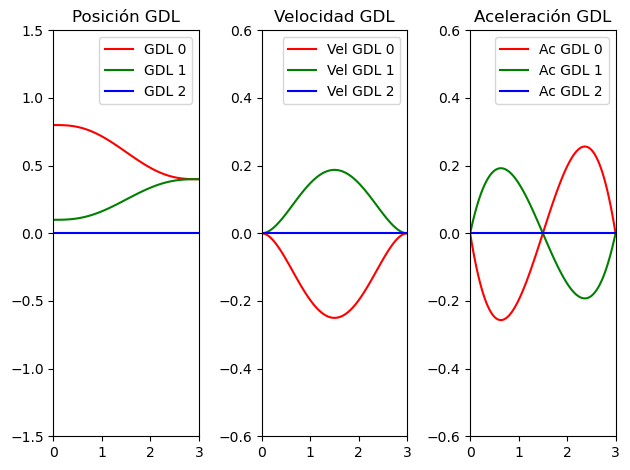

In [19]:
#Se define una funcion para el planteramiento de la trayectoria 

def generateTrajectory(gdl_in, gdl_fn, v0, vf, a0, af, time, frec=20):   
    
    # Definición de variables simbólicas
    t = symbols('t')
    a_0, a_1, a_2, a_3, a_4, a_5, t = symbols('a_0 a_1 a_2 a_3 a_4 a_5 t')

    # Definir el polinomio de 5º grado
    lam = a_0 + a_1*t + a_2*(t**2) + a_3*(t**3) + a_4*(t**4) + a_5*(t**5)

    # Derivadas del polinomio
    lam_dot     = diff(lam    , t)
    lam_dot_dot = diff(lam_dot, t)

    # Resolver el sistema de ecuaciones con las condiciones de contorno
    terms = solve([
        lam.subs(t, time[0]) - 0,                         # s(t0) = 0
        lam.subs(t, time[1]) - 1,                         # s(tf) = 1
        lam_dot.subs(t, time[0]) - v0[0],                 # v(t0) = v0[0]
        lam_dot.subs(t, time[1]) - vf[0],                 # v(tf) = vf[0]
        lam_dot.subs(t, time[0]) - v0[1],                 # v(t0) = v0[1]
        lam_dot.subs(t, time[1]) - vf[1],                 # v(tf) = vf[1]
        lam_dot.subs(t, time[0]) - v0[2],                 # v(t0) = v0[2]
        lam_dot.subs(t, time[1]) - vf[2],                 # v(tf) = vf[2]
        lam_dot_dot.subs(t, time[0]) - a0[0],             # a(t0) = a0[0]
        lam_dot_dot.subs(t, time[1]) - af[0],             # a(tf) = af[0]
        lam_dot_dot.subs(t, time[0]) - a0[1],             # a(t0) = a0[1]
        lam_dot_dot.subs(t, time[1]) - af[1],             # a(tf) = af[1]
        lam_dot_dot.subs(t, time[0]) - a0[2],             # a(t0) = a0[2]
        lam_dot_dot.subs(t, time[1]) - af[2]              # a(tf) = af[2]
    ], [a_0, a_1, a_2, a_3, a_4, a_5], dict=True)

    print(terms[0])
    
    # Sustituir los coeficientes en el polinomio
    lam_s         = lam.subs(terms[0])
    lam_s_dot     = lam_dot.subs(terms[0])
    lam_s_dot_dot = lam_dot_dot.subs(terms[0])

    # Calcular la cantidad de muestras
    samples = int(frec * (time[1] - time[0]) + 1)  # Convertir a entero
    dt      = 1.0 / frec

    # Crear listas para almacenar las posiciones, velocidades y aceleraciones
    gdl         = []
    gdl_dot     = []
    gdl_dot_dot = []

    # Ciclo para calcular las trayectorias de los GDL en cada instante de tiempo
    for a in range(samples):
        # Calculando posición de los GDL usando la función lam_s(t)
        time_at_a = time[0] + float(a)*dt
        
        gdl.append((
            gdl_in[0] + lam_s.subs(t, time_at_a) * (gdl_fn[0] - gdl_in[0]),
            gdl_in[1] + lam_s.subs(t, time_at_a) * (gdl_fn[1] - gdl_in[1]),
            gdl_in[2] + lam_s.subs(t, time_at_a) * (gdl_fn[2] - gdl_in[2])
        ))

        # Calculando velocidad de los GDL usando la derivada lam_s_dot(t)
        gdl_dot.append((
            lam_s_dot.subs(t, time_at_a) * (gdl_fn[0] - gdl_in[0]),
            lam_s_dot.subs(t, time_at_a) * (gdl_fn[1] - gdl_in[1]),
            lam_s_dot.subs(t, time_at_a) * (gdl_fn[2] - gdl_in[2])
        ))

        # Calculando aceleración de los GDL usando la derivada segunda lam_s_dot_dot(t)
        gdl_dot_dot.append((
            lam_s_dot_dot.subs(t, time_at_a) * (gdl_fn[0] - gdl_in[0]),
            lam_s_dot_dot.subs(t, time_at_a) * (gdl_fn[1] - gdl_in[1]),
            lam_s_dot_dot.subs(t, time_at_a) * (gdl_fn[2] - gdl_in[2])
        ))

    return gdl, gdl_dot, gdl_dot_dot

#Se proponen condiciones inciles 

gdl_in = [0.8, 0.1, 0.0]                # Condiciones iniciales de las juntas (ángulos en radianes)
gdl_fn = [0.4, 0.4, 0.0]                # Condiciones finales de las juntas (ángulos en radianes)

# Tiempo de la trayectoria (de 0 a tf), y la frecuencia de muestreo (por ejemplo, 20 Hz)
time = [0, 3]  # Tiempo total de la trayectoria (en segundos)
frec = 30      # Frecuencia de muestreo (en Hz)

# Condiciones de las velocidades y aceleraciones
v0 = [0, 0, 0]  # Velocidades iniciales en cada GDL
vf = [0, 0, 0]  # Velocidades finales en cada GDL
a0 = [0, 0, 0]  # Aceleraciones iniciales en cada GDL
af = [0, 0, 0]  # Aceleraciones finales en cada GDL


#Se crea una funcion para imprimir las trayectorias de los GDL
def trayectory_GDL(gdl, gdl_dot, gdl_dot_dot, frec):
    
    # Inicialización de listas para almacenar las posiciones, velocidades y aceleraciones
    gdl_t   = []  # Tiempo de los GDL
    gdl_p_0 = []  # Posición GDL 0
    gdl_p_1 = []  # Posición GDL 1
    gdl_p_2 = []  # Posición GDL 2
    gdl_v_0 = []  # Velocidad GDL 0
    gdl_v_1 = []  # Velocidad GDL 1
    gdl_v_2 = []  # Velocidad GDL 2
    gdl_a_0 = []  # Aceleración GDL 0
    gdl_a_1 = []  # Aceleración GDL 1
    gdl_a_2 = []  # Aceleración GDL 2

    # Rellenamos las listas con los valores calculados para los GDL
    for i in range(len(gdl)):
        gdl_t.append(float(i) / frec)      # Tiempo para los GDL
        gdl_p_0.append(gdl[i][0])          # Posición GDL 0
        gdl_p_1.append(gdl[i][1])          # Posición GDL 1
        gdl_p_2.append(gdl[i][2])          # Posición GDL 2
        gdl_v_0.append(gdl_dot[i][0])      # Velocidad GDL 0
        gdl_v_1.append(gdl_dot[i][1])      # Velocidad GDL 1
        gdl_v_2.append(gdl_dot[i][2])      # Velocidad GDL 2
        gdl_a_0.append(gdl_dot_dot[i][0])  # Aceleración GDL 0
        gdl_a_1.append(gdl_dot_dot[i][1])  # Aceleración GDL 1
        gdl_a_2.append(gdl_dot_dot[i][2])  # Aceleración GDL 2

    # Crear la figura y los subgráficos
    fig, ((gdl_plot, gdl_dot_plot, gdl_dot_dot_plot) ) = plt.subplots(nrows=1, ncols=3)

    # Gráficas GDL
    gdl_plot.set_title("Posición GDL")
    gdl_plot.axis((0, 3, -1.5, 1.5))
    gdl_plot.plot(gdl_t, gdl_p_0, color="RED", label="GDL 0")
    gdl_plot.plot(gdl_t, gdl_p_1, color="GREEN", label="GDL 1")
    gdl_plot.plot(gdl_t, gdl_p_2, color="BLUE", label="GDL 2")
    gdl_plot.legend()

    gdl_dot_plot.set_title("Velocidad GDL")
    gdl_dot_plot.axis((0, 3, -0.6, 0.6))
    gdl_dot_plot.plot(gdl_t, gdl_v_0, color="RED", label="Vel GDL 0")
    gdl_dot_plot.plot(gdl_t, gdl_v_1, color="GREEN", label="Vel GDL 1")
    gdl_dot_plot.plot(gdl_t, gdl_v_2, color="BLUE", label="Vel GDL 2")
    gdl_dot_plot.legend()

    gdl_dot_dot_plot.set_title("Aceleración GDL")
    gdl_dot_dot_plot.axis((0, 3, -0.6, 0.6))
    gdl_dot_dot_plot.plot(gdl_t, gdl_a_0, color="RED", label="Ac GDL 0")
    gdl_dot_dot_plot.plot(gdl_t, gdl_a_1, color="GREEN", label="Ac GDL 1")
    gdl_dot_dot_plot.plot(gdl_t, gdl_a_2, color="BLUE", label="Ac GDL 2")
    gdl_dot_dot_plot.legend()

    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()   

# Llamar a la función de trayectorias para obtener las posiciones, velocidades y aceleraciones de los GDL 
gdl, gdl_dot, gdl_dot_dot = generateTrajectory(gdl_in, gdl_fn, v0, vf, a0, af, time, frec)
#Se muestran las Graficas
trayectory_GDL(gdl, gdl_dot, gdl_dot_dot, frec)


### 4. Aplicación de la cinemática inversa
Finalmente, a partir de los puntos de la trayectoria y el modelo de cinemática inversa, obtener las posiciones, velocidades y aceleraciones de las juntas del robot, así como sus gráficas en función del tiempo

Iteración: 0
Iteración: 1
Iteración: 2
Iteración: 3
Iteración: 4
Iteración: 5
Iteración: 6
Iteración: 7
Iteración: 8
Iteración: 9
Iteración: 10
Iteración: 11
Iteración: 12
Iteración: 13
Iteración: 14
Iteración: 15
Iteración: 16
Iteración: 17
Iteración: 18
Iteración: 19
Iteración: 20
Iteración: 21
Iteración: 22
Iteración: 23
Iteración: 24
Iteración: 25
Iteración: 26
Iteración: 27
Iteración: 28
Iteración: 29
Iteración: 30
Iteración: 31
Iteración: 32
Iteración: 33
Iteración: 34
Iteración: 35
Iteración: 36
Iteración: 37
Iteración: 38
Iteración: 39
Iteración: 40
Iteración: 41
Iteración: 42
Iteración: 43
Iteración: 44
Iteración: 45
Iteración: 46
Iteración: 47
Iteración: 48
Iteración: 49
Iteración: 50
Iteración: 51
Iteración: 52
Iteración: 53
Iteración: 54
Iteración: 55
Iteración: 56
Iteración: 57
Iteración: 58
Iteración: 59
Iteración: 60
Iteración: 61
Iteración: 62
Iteración: 63
Iteración: 64
Iteración: 65
Iteración: 66
Iteración: 67
Iteración: 68
Iteración: 69
Iteración: 70
Iteración: 71
It

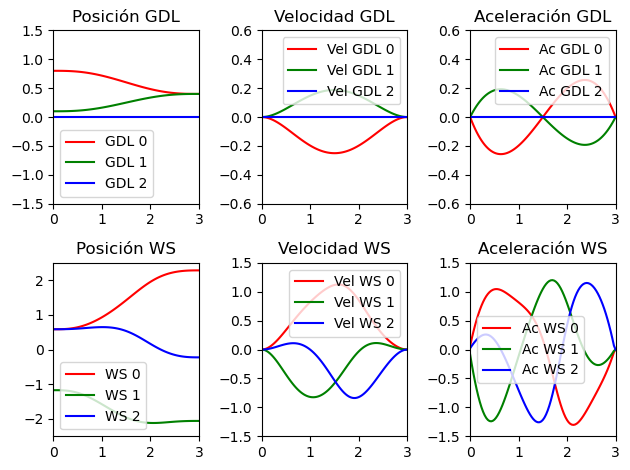

In [20]:
#Para para aplicar la cinematia inversa apartir de la trayectoria e impirmir todas las graficas, se crea una nueva 
#funcion para imprimir. 

def trayectory_graphics(gdl, gdl_dot, gdl_dot_dot, ws, ws_dot, ws_dot_dot, frec):
    
    # Inicialización de listas para almacenar las posiciones, velocidades y aceleraciones
    gdl_t   = []  # Tiempo de los GDL
    gdl_p_0 = []  # Posición GDL 0
    gdl_p_1 = []  # Posición GDL 1
    gdl_p_2 = []  # Posición GDL 2
    gdl_v_0 = []  # Velocidad GDL 0
    gdl_v_1 = []  # Velocidad GDL 1
    gdl_v_2 = []  # Velocidad GDL 2
    gdl_a_0 = []  # Aceleración GDL 0
    gdl_a_1 = []  # Aceleración GDL 1
    gdl_a_2 = []  # Aceleración GDL 2

    # Espacio de trabajo (WS)
    ws_t   = []  # Tiempo WS
    ws_p_0 = []  # Posición WS 0
    ws_p_1 = []  # Posición WS 1
    ws_p_2 = []  # Posición WS 2
    ws_v_0 = []  # Velocidad WS 0
    ws_v_1 = []  # Velocidad WS 1
    ws_v_2 = []  # Velocidad WS 2
    ws_a_0 = []  # Aceleración WS 0
    ws_a_1 = []  # Aceleración WS 1
    ws_a_2 = []  # Aceleración WS 2

    # Rellenamos las listas con los valores calculados para los GDL
    for i in range(len(gdl)):
        gdl_t.append(float(i) / frec)      # Tiempo para los GDL
        gdl_p_0.append(gdl[i][0])          # Posición GDL 0
        gdl_p_1.append(gdl[i][1])          # Posición GDL 1
        gdl_p_2.append(gdl[i][2])          # Posición GDL 2
        gdl_v_0.append(gdl_dot[i][0])      # Velocidad GDL 0
        gdl_v_1.append(gdl_dot[i][1])      # Velocidad GDL 1
        gdl_v_2.append(gdl_dot[i][2])      # Velocidad GDL 2
        gdl_a_0.append(gdl_dot_dot[i][0])  # Aceleración GDL 0
        gdl_a_1.append(gdl_dot_dot[i][1])  # Aceleración GDL 1
        gdl_a_2.append(gdl_dot_dot[i][2])  # Aceleración GDL 2

    # Rellenamos las listas con los valores calculados para el espacio de trabajo (WS)
    for i in range(len(ws)):
        ws_t.append(float(i) / frec)     # Tiempo para el WS
        ws_p_0.append(ws[i][0])          # Posición WS 0
        ws_p_1.append(ws[i][1])          # Posición WS 1
        ws_p_2.append(ws[i][2])          # Posición WS 2
        ws_v_0.append(ws_dot[i][0])      # Velocidad WS 0
        ws_v_1.append(ws_dot[i][1])      # Velocidad WS 1
        ws_v_2.append(ws_dot[i][2])      # Velocidad WS 2
        ws_a_0.append(ws_dot_dot[i][0])  # Aceleración WS 0
        ws_a_1.append(ws_dot_dot[i][1])  # Aceleración WS 1
        ws_a_2.append(ws_dot_dot[i][2])  # Aceleración WS 2

    # Crear la figura y los subgráficos
    fig, ((gdl_plot, gdl_dot_plot, gdl_dot_dot_plot),
          (ws_plot, ws_dot_plot, ws_dot_dot_plot)) = plt.subplots(nrows=2, ncols=3)

    # Gráficas GDL
    gdl_plot.set_title("Posición GDL")
    gdl_plot.axis((0, 3, -1.5, 1.5))
    gdl_plot.plot(gdl_t, gdl_p_0, color="RED", label="GDL 0")
    gdl_plot.plot(gdl_t, gdl_p_1, color="GREEN", label="GDL 1")
    gdl_plot.plot(gdl_t, gdl_p_2, color="BLUE", label="GDL 2")
    gdl_plot.legend()

    gdl_dot_plot.set_title("Velocidad GDL")
    gdl_dot_plot.axis((0, 3, -0.6, 0.6))
    gdl_dot_plot.plot(gdl_t, gdl_v_0, color="RED", label="Vel GDL 0")
    gdl_dot_plot.plot(gdl_t, gdl_v_1, color="GREEN", label="Vel GDL 1")
    gdl_dot_plot.plot(gdl_t, gdl_v_2, color="BLUE", label="Vel GDL 2")
    gdl_dot_plot.legend()

    gdl_dot_dot_plot.set_title("Aceleración GDL")
    gdl_dot_dot_plot.axis((0, 3, -0.6, 0.6))
    gdl_dot_dot_plot.plot(gdl_t, gdl_a_0, color="RED", label="Ac GDL 0")
    gdl_dot_dot_plot.plot(gdl_t, gdl_a_1, color="GREEN", label="Ac GDL 1")
    gdl_dot_dot_plot.plot(gdl_t, gdl_a_2, color="BLUE", label="Ac GDL 2")
    gdl_dot_dot_plot.legend()

    # Gráficas WS
    ws_plot.set_title("Posición WS")
    ws_plot.axis((0, 3, -2.5, 2.5))
    ws_plot.plot(ws_t, ws_p_0, color="RED", label="WS 0")
    ws_plot.plot(ws_t, ws_p_1, color="GREEN", label="WS 1")
    ws_plot.plot(ws_t, ws_p_2, color="BLUE", label="WS 2")
    ws_plot.legend()

    ws_dot_plot.set_title("Velocidad WS")
    ws_dot_plot.axis((0, 3, -1.5, 1.5))
    ws_dot_plot.plot(ws_t, ws_v_0, color="RED", label="Vel WS 0")
    ws_dot_plot.plot(ws_t, ws_v_1, color="GREEN", label="Vel WS 1")
    ws_dot_plot.plot(ws_t, ws_v_2, color="BLUE", label="Vel WS 2")
    ws_dot_plot.legend()

    ws_dot_dot_plot.set_title("Aceleración WS")
    ws_dot_dot_plot.axis((0, 3, -1.5, 1.5))
    ws_dot_dot_plot.plot(ws_t, ws_a_0, color="RED", label="Ac WS 0")
    ws_dot_dot_plot.plot(ws_t, ws_a_1, color="GREEN", label="Ac WS 1")
    ws_dot_dot_plot.plot(ws_t, ws_a_2, color="BLUE", label="Ac WS 2")
    ws_dot_dot_plot.legend()

    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()   


# Calcula la posicion en base a la cinematica inversa gdl, gdl_dot, gdl_dot_dot
ws, ws_dot, ws_dot_dot    = inverse_kinematics( gdl_in, gdl, gdl_dot, gdl_dot_dot, dim, base_dim, base_rot, time, frec) 

trayectory_graphics(gdl, gdl_dot, gdl_dot_dot, ws, ws_dot, ws_dot_dot, frec)



### 5. Github
Para terminar, crear un repositorio en línea en gihub, donde se subirán los archivos de la práctica. 
Se recomienda primero crear el repositorio en línea, clonarlo en el ordenador y después incluir los archivos de la práctica. 
Para utilizar el repositorio para todas las prácticas posteriores, se recomienda usar la siguiente estructura de archivos:
~~~ bash
repositorio_practicas/
├── practica_2
│   ├── imagenes
│   │   └── P2_IM1.png
│   └── Practica_2.ipynb
└── README.md
~~~
Dentro del archivo README.md (Creado de forma automática en el repositorio en línea), colocar los nombres de los integrantes del equipo.

## Análisis de resultados

¿Qué utilidad tiene el modelo de cinemática inversa de un robot?
> El modelo de cinemática inversa es muy importante en el diseño de robots manipuladores y móviles, ya que permite determinar las trayectorias que deben seguir las juntas para alcanzar una posición deseada. Este modelo no solo nos ayuda a planificar los movimientos, sino que también nos permite analizar si la posición objetivo es alcanzable con el diseño actual del robot; y si no es posible, nos proporciona la base para aplicar cambios o mejoras en el diseño, como ajustar el rango de movimiento de las juntas o modificar la estructura del robot.    

¿Controlar las condiciones iniciales y finales de la trayectoria del efector final tiene un efecto en las condiciones inicial y final de las juntas?
> Sí, tienen un efecto. Si se modifican las condiciones iniciales y finales del efector final, se afectarán las condiciones iniciales y finales de las juntas. Esto debido a que la cinemática directa e inversa cambiarán para llegar a esa nueva posición.     

¿Qué utilidad tiene el uso de un repositorio en línea para código?
> Es de suma utilidad, ya que permite mantener un respaldo sólido de tu trabajo y avance en proyectos, además de compartir con demás personas tu código de manera instantánea, así como mostrar un control de versiones y el acceso remoto.



## Conclusiones
A lo largo de la práctica se logró cumplir los objetivos planteados. Se aplicaron los conocimientos vistos en teoría, tales como matriz de transformación homogénea, cinemática inversa y directa, generación de trayectorias por medio de polinomios, y posteriormente se aplicó a un robot RRR, donde se implementó lo siguiente:

- Aplicación del modelo cinemático inverso para obtener la trayectoria de las juntas, dado un efector final.

- Se analizaron las gráficas de las trayectorias, donde se verificó que el robot efectivamente llega a la posición deseada, con una curva de   velocidad y aceleración igual a cero.

- Finalmente, se creó un repositorio en GitHub para su posterior actualización y control de versiones.  


## Bibliografía 

[1] J. J. Craig, Introducción a la robótica: Análisis, control y aplicaciones. 4ta ed. México: Pearson Educación, 2011.

[2] GitHub, "GitHub Documentation," GitHub, Inc. [Enlace]. [Accedido: 10-nov-2024]. [Enlace: https://docs.github.com].

